In [2]:
from mmdet.core.anchor.anchor_generator import AnchorGenerator
import torch

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


In [105]:
input_shape_hw = (3, 1000, 1000)
img = torch.zeros(input_shape_hw,dtype=torch.uint8)
strides = [4, 8, 16, 32]
feature_map = [(input_shape_hw[1] // stride, input_shape_hw[2] // stride) for stride in strides]
anchor_generator_cfg = dict(
    type='AnchorGenerator',
    scales = [6, 4, 2],
    ratios = [0.5, 1.0, 2.0],
    strides = strides,
)

In [106]:
from mmdet.core.anchor.builder import build_prior_generator
import numpy as np

anchor_generator = build_prior_generator(anchor_generator_cfg)
anchor = anchor_generator.grid_priors(feature_map,device='cpu')[0].cpu().numpy()
rand_anchor = torch.tensor(np.random.permutation(anchor))

In [107]:
from torchvision.utils import draw_bounding_boxes
import numpy as np
result_img = draw_bounding_boxes(img, rand_anchor[:500])

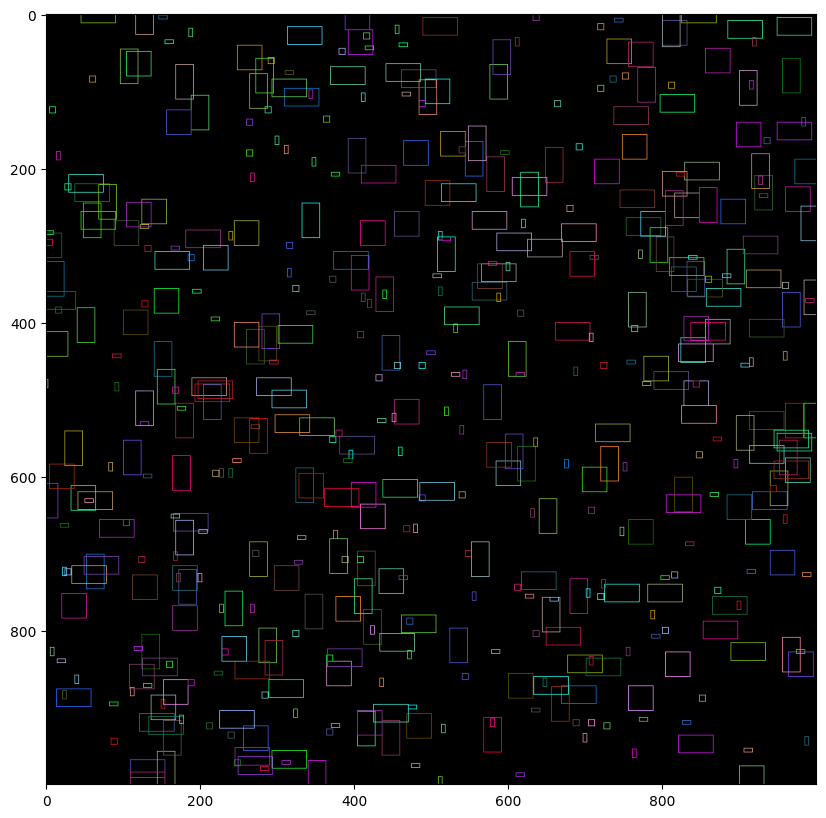

In [108]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(result_img.permute(1,2,0))